# Convolutional Neural Network

## 1 Principle Introduction

Convolutional neural network (CNN) is a deep learning algorithms that takes image as input. The structure of CNN is also similar to the neural network that we introduced previously. But covolutional calculation is introduced to reduce the number of parameters in the network.

### 1.1 Layers used in ConvNets

#### Convolutional Computation

A convolutional neural network is usually used to to deal with images. With a convolutional neural network, a filter with relatively low dimensions can be used to execute convolution computation iteratively. At the same time, after convolution computation, the dimension of image data can be reduced sharply. Therefore, the number of trainable parameters would be lower and the time required for training could also be shorter.6

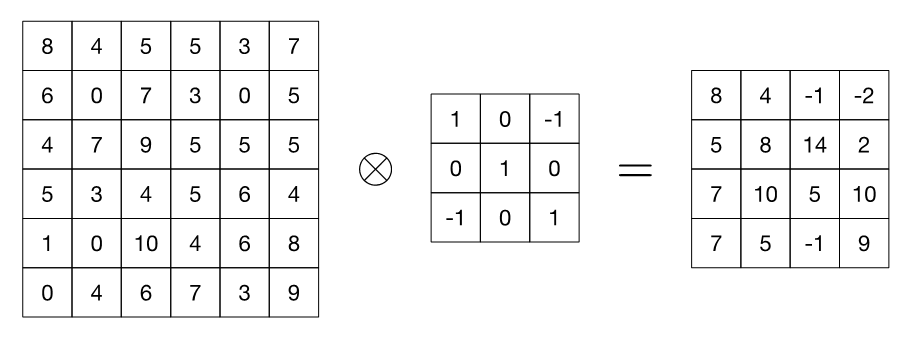

In [7]:
from IPython.display import Image
Image(filename="D:/Jupyter_space/cov_2d.png", width=600, height=600)

The above figure illustrates convolution between a matrix with the dimensions  and a filter with the dimensions . The result is a matrix with the dimensions . Convolution calculation is not only limited to two-dimensional matrices, but also works for three-dimensional matrices. So in a convolutional neural network, the RGB figure does not need to be split into three single two-dimensional matrices, instead it can be taken as a three-dimensional matrix and the convolution calculated directly.

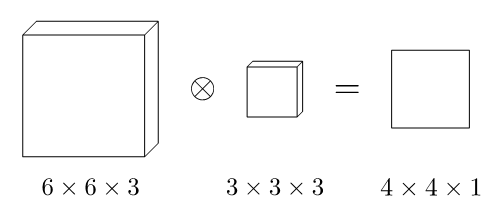

In [8]:
from IPython.display import Image
Image(filename="D:/Jupyter_space/conv_3d.png", width=600, height=600)

#### Convolutional layer

The convolutional layer is the most important layer for a CNN (Convolutional Neural Network). In this layer, the input matrix will be convolved with the filter and when we train the CNN, elements of the filter will be trainable, but the dimension does not change.   

Some hyper parameters could also be used to set how the convolution is executed. The result of convolution between a three-dimensional input and a three-dimensional filter is a two-dimensional matrix. If we set the number of filters as , then output with  channels can be obtained.

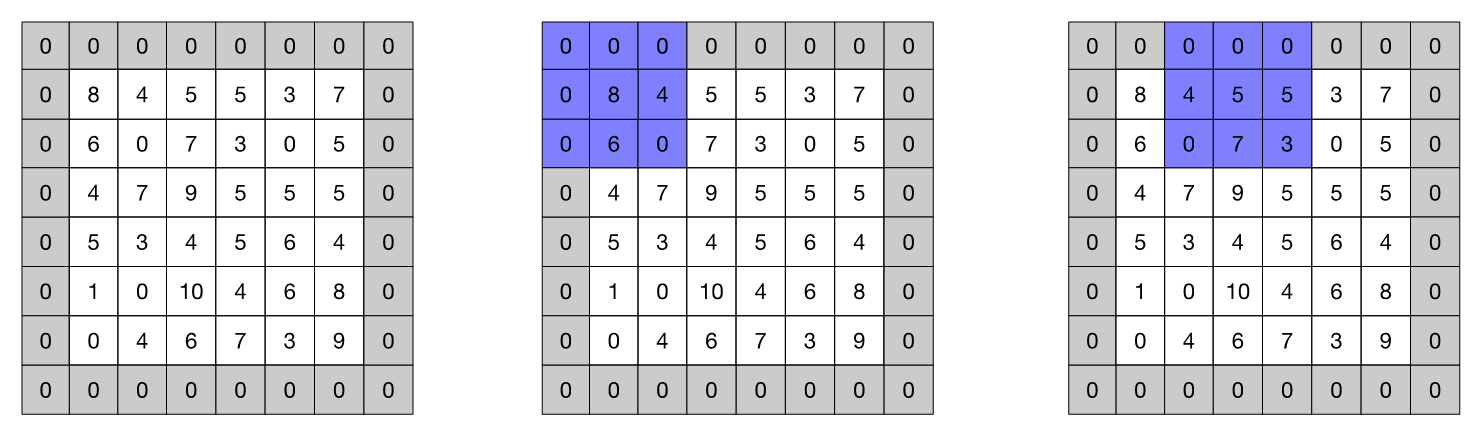

In [10]:
from IPython.display import Image
Image(filename="D:/Jupyter_space/conv_layer.png", width=800, height=800, )

The number of padding $P$ tells us how many rows and columns would be padded outside the original input matrix. In the above figure, the left matrix is padded using zeros and set $P=1$. Another important hyperparameter is stride $S$, which defines the number of steps between two adjacent convolutions. The middle and right matrices in the above figure are an example of which part of the input matrix will be convolved with the filter when $S=2$ .
 
Suppose that $n_i$ is one dimension of the input matrix and $n_o$ is the corresponding dimension of the output matrix. The dimension of the filter is denoted as $f$. The relationship between $n_o$ and $n_i$ could be described using the following formula.
$$ n_o = \frac{n_i - f + 2P}{S} + 1 $$

#### Pooling layer

A pooling layer could decrease the matrix size or activation rapidly. Similar to a convolution layer, a pooling layer also has a filter. But the operation is a nonlinear function, such as a max operation, average operation and so on.

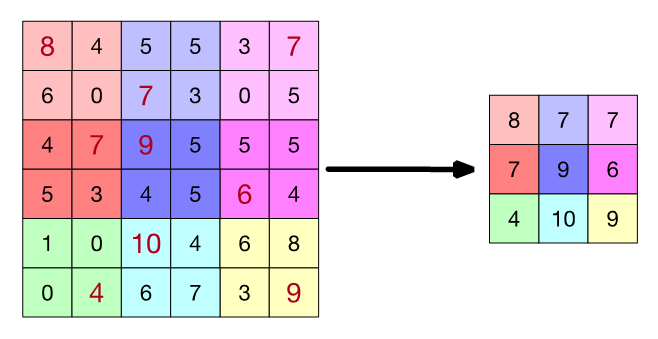

In [11]:
Image(filename="D:/Jupyter_space/max_pooling.png", width=800, height=800)

In the above figure, the dimension of the input matrix is $6 \times 6$, and after max pooling the output matrix has a  $3\times 3$ dimension. Another point that should be noted is that the pooling operation is executed on a single slice of the matrix, e.g. a two-dimensional matrix. Therefore, pooling only reduces the width and height of the matrix but does not change the number of channels. A pooling layer is often used after a convolutional layer, and in a pooling layer there are no trainable parameters.

#### Dropout layer

Dropout refers to ignoring units (i.e. neurons) during the training phase of certain set of neurons which is chosen at random. By “ignoring”, I mean these units are not considered during a particular forward or backward pass.  

More technically, At each training stage, individual nodes are either dropped out of the net with probability 1-p or kept with probability p, so that a reduced network is left; incoming and outgoing edges to a dropped-out node are also removed. In this way, the parameter of our model or network would be reduced, and at the same, the model could not be so specific on the dataset and could prevent overfitting.

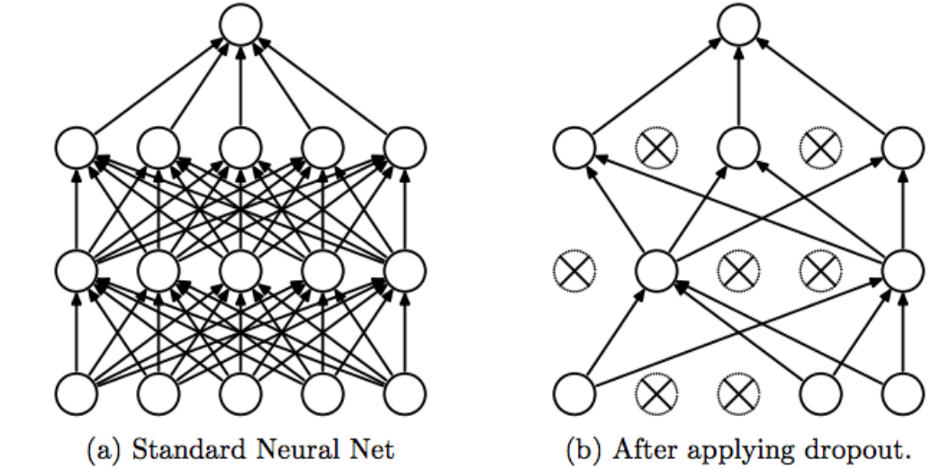

In [13]:
Image(filename="D:/Jupyter_space/dropout.png", width=800, height=800)

## 2 Application

Here, we use the MNIST dataset to apply convolutional neural network. At first, we use Keras to load the dataset, and spilit it into training set and testing set.

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Text(0.5, 1.0, '5')

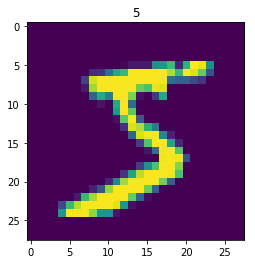

In [26]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])
plt.title(y_train[0])

We could find that even the dataset is the same, but the dimensions of every image loaded by keras is different from loaded by Sklearn. In keras every image has a dimension of $28 \times 28$, however in Sklearn, ever image has a dimension of $8 \times 8$.

In [27]:
from keras.utils import to_categorical

print(y_train[0])
#one-hot encode target column
y_train_vec = to_categorical(y_train)
y_test_vec = to_categorical(y_test)
print(y_train_vec[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In this problem, our task is to classify the image, e.g. we should predict $\hat{y}$ as $0, 1, 2, ..., 9$ accoroding to the $x$. In classification problem, usually the $y$ should be converted to on-hot vector. For example, if $y = 5$, the coresponding vector should be $[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]$.  

The following sectiong will build up the model.

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.utils.vis_utils import plot_model
import pydot

#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


After building up the model, we also need to complie it. Opimizing algorithm, loss fuction and metric should be difined in the compile step.

In [31]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Then we will use the data to train the neural network that we builded and compiled.

In [34]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

#train the model
model.fit(X_train, y_train_vec, validation_data=(X_test, y_test_vec), epochs=3)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 14s 236us/step - loss: 1.8461 - acc: 0.8547 - val_loss: 0.0820 - val_acc: 0.9734
Epoch 2/3
60000/60000 [==============================] - 9s 149us/step - loss: 0.0667 - acc: 0.9795 - val_loss: 0.0715 - val_acc: 0.9794
Epoch 3/3
60000/60000 [==============================] - 9s 152us/step - loss: 0.0461 - acc: 0.9853 - val_loss: 0.0879 - val_acc: 0.9749


Next, a normal neural network will be builded and compiled.

In [44]:
# define a sequential model
model_2 = Sequential()

image_size = 784 # 28*28=784
num_classes = 10

# add layers to teh sequential model
model_2.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model_2.add(Dense(units=32, activation='sigmoid'))
model_2.add(Dense(units=32, activation='sigmoid'))
model_2.add(Dense(units=num_classes, activation='softmax')) 

# use the following function to print the architecture of network
model_2.summary()

# compile the model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

X_train = X_train.reshape(X_train.shape[0], 28*28) 
X_test = X_test.reshape(X_test.shape[0], 28*28)

# train the model
model_2.fit(X_train, y_train_vec, validation_data=(X_test, y_test_vec), epochs=3)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_21 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_22 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 8s 126us/step - loss: 1.1971 - acc: 0.6426 - val_loss: 0.7031 - val_acc: 0.7968
Epoch 2/3
60000/60000 [==============================] - 7s 120us/step - loss: 0.63

We could find that compared with normal fully connected neural networks, the training phase of convolutional neural network could converge faster.

In [56]:
! pip install pygraphviz

  Using cached https://files.pythonhosted.org/packages/7e/b1/d6d849ddaf6f11036f9980d433f383d4c13d1ebcfc3cd09bc845bda7e433/pygraphviz-1.5.zip
  Complete output from command C:\ProgramData\Anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\Zhu\\AppData\\Local\\Temp\\pip-install-lw3lfznx\\pygraphviz\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d C:\Users\Zhu\AppData\Local\Temp\pip-wheel-9i8vmq1_ --python-tag cp37:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.7
  creating build\lib.win-amd64-3.7\pygraphviz
  copying pygraphviz\agraph.py -> build\lib.win-amd64-3.7\pygraphviz
  copying pygraphviz\graphviz.py -> build\lib.win-amd64-3.7\pygraphviz
  copying pygraphviz\release.py -> build\lib.win-amd64-3.7\pygraphviz
  copying pygraphviz\version.py -> build\lib.win-amd64-3.7\pygraphviz
  copying pygrap

  Failed building wheel for pygraphviz
Command "C:\ProgramData\Anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\Zhu\\AppData\\Local\\Temp\\pip-install-lw3lfznx\\pygraphviz\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\Zhu\AppData\Local\Temp\pip-record-7t8ly6q9\install-record.txt --single-version-externally-managed --compile" failed with error code 1 in C:\Users\Zhu\AppData\Local\Temp\pip-install-lw3lfznx\pygraphviz\
You are using pip version 19.0.3, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [50]:
import pydot

In [58]:
import sys
sys.executable

'C:\\ProgramData\\Anaconda3\\python.exe'

In [2]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']